### Problem Statement

You are a data scientist working on a classification problem to predict whether a hotel reservation will be canceled or not. You have been provided with a dataset named **`"hotel_reservations.csv"`**, which includes various attributes related to hotel bookings. The dataset comprises the following columns:

- `booking_id:` unique identifier of each booking
- `no_of_adults:` Number of adults
- `no_of_children:` Number of Children
- `no_of_weekend_nights:` Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `no_of_week_nights:` Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- `type_of_meal_plan:` Type of meal plan booked by the customer
- `required_car_parking_space:` Does the customer require a car parking space? (0 - No, 1- Yes)
- `room_type_reserved:` Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels
- `lead_time:` Number of days between the date of booking and the arrival date
- `arrival_year:` Year of arrival date
- `arrival_month:` Month of arrival date
- `arrival_date:` Date of the month
- `market_segment_type:` Market segment designation
- `repeated_guest:` Is the customer a repeated guest? (0 - No, 1- Yes)
- `no_of_previous_cancellations:` Number of previous bookings that were canceled by the customer prior to the current booking
- `no_of_previous_bookings_not_canceled:` Number of previous bookings not canceled by the customer prior to the current booking
- `avg_price_per_room:` Average price per day of the reservation; prices of the rooms are dynamic (in euros)
- `no_of_special_requests:` Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- `booking_status:` Flag indicating if the booking was canceled or not (Not_Canceled = 0, Canceled = 1)


You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, random forest, and Naive Bayes. Additionally, you will implement k-fold cross-validation, stratified k-fold cross-validation, grid search, and randomized search techniques.

**Dataset Credits:** Ahsan Raza (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

**Import Necessary Libraries**


In [1]:
# Import Necessary Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Task 1: Data Preprocessing and EDA

1. Import the data from the `"hotel_reservations.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
5. Remove the columns `booking_id, arrival_year, arrival_month, and arrival_date` as they do not add significant value to the predictive model.
6. Visualize the booking_status using a count plot.
7. Visualize the lead time for canceled and not canceled bookings using a box plot.
8. Visualize the average price per room for canceled and not canceled bookings using a box plot.
9. Encode categorical variables: type_of_meal_plan, room_type_reserved, and market_segment_type using one-hot encoding.

In [2]:
# Import the data from the "hotel_reservations.csv" file and store it in a variable df.

df = pd.read_csv('hotel_reservations.csv')

In [3]:
# Display the number of rows and columns in the dataset

df.shape

(36275, 19)

In [4]:
# Display the first few rows of the dataset to get an overview
df.head()

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
# Remove the columns booking_id, arrival_year, arrival_month, and arrival_date

df = df.drop(['booking_id', 'arrival_year', 'arrival_month', 'arrival_date'], axis=1)

In [6]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled


<Axes: >

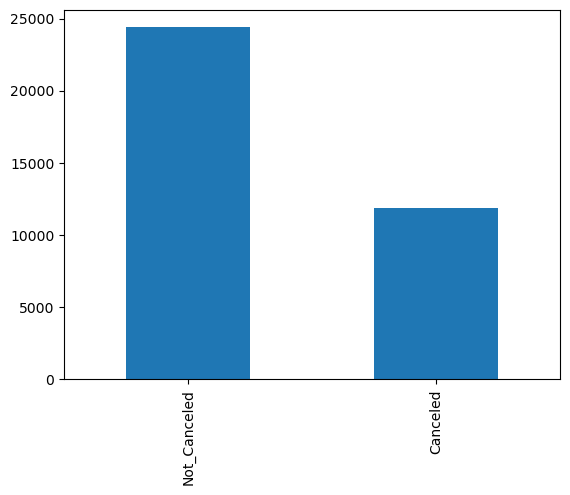

In [7]:
# Visualize the booking_status

df['booking_status'].value_counts().plot(kind='bar')
#or
# sns.countplot(x='booking_status',data=df)

<Axes: xlabel='booking_status', ylabel='lead_time'>

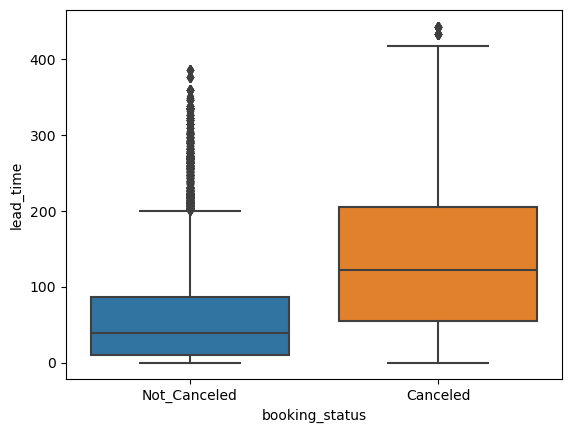

In [8]:
# Visualize the lead time for canceled and not canceled bookings using a box plot

sns.boxplot(y='lead_time',x='booking_status',data=df)

<Axes: xlabel='booking_status', ylabel='avg_price_per_room'>

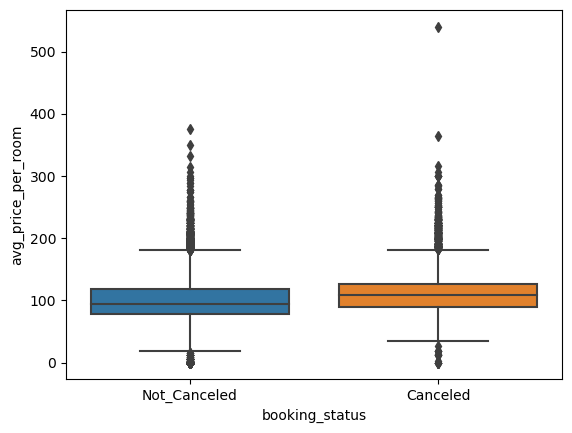

In [9]:
# Visualize the average price per room for canceled and not canceled bookings

sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)


In [10]:
# Encode categorical variables : type_of_meal_plan, room_type_reserved, and market_segment_type using one-hot encoding.

df = pd.get_dummies(df,columns=['type_of_meal_plan','room_type_reserved','market_segment_type'],drop_first=True)

### Task 2: Feature Scaling

1. Standardize the numerical features `lead_time` and `avg_price_per_room`.
2. Define features (X) and target (y).

In [11]:
# Standardize the numerical features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[['lead_time','avg_price_per_room']] = scaler.fit_transform(df[['lead_time','avg_price_per_room']])

In [12]:
# Define features(X) and target (y: booking_status)

X = df.drop('booking_status',axis=1)
y =df['booking_status']

### Task 3: Implementing K-Fold Cross Validation

1. Initialize a KFold cross-validator with 7 splits.
2. Perform k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform k-fold cross-validation using a decision tree classifier and calculate the average accuracy.

In [13]:
# Initialize KFold with 7 splits.

from sklearn.model_selection import KFold
kf = KFold(n_splits=7,shuffle=True,random_state=42)

In [14]:
# Cross validation with Naive Bayes

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
score=cross_val_score(GaussianNB(),X,y,cv=kf,scoring='accuracy')
print(score)
print(np.average(score))

[0.41115184 0.41605558 0.40119645 0.41605558 0.41084523 0.4000386
 0.40486299]
0.4086008945293444


In [16]:
# Cross validation with Logistic Regression

from sklearn.linear_model import LogisticRegression
score = cross_val_score(LogisticRegression(max_iter=1000),X,y,cv=kf,scoring='accuracy')
print(score)
print(np.average(score))

[0.80223809 0.80470861 0.801621   0.79911231 0.79428792 0.79563875
 0.80644539]
0.8005788653557354


In [17]:
# Cross validation with Decision Tree

from sklearn.tree import DecisionTreeClassifier
score = cross_val_score(DecisionTreeClassifier(),X,y,cv=kf,scoring='accuracy')
print(score)
print(np.average(score))

[0.85413853 0.86646083 0.85681204 0.8579699  0.8595137  0.85893477
 0.85854882]
0.8589112273658871


### Task 4: Implementing Stratified K-Fold Cross Validation

1. Initialize a StratifiedKFold cross-validator with 7 splits
2. Perform stratified k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform stratified k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform stratified k-fold cross-validation using a Decision Tree classifier and calculate the average accuracy.

In [24]:
# Initialize a StratifiedKFold cross-validator with 7 splits

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=7,shuffle=True,random_state=42)

In [25]:
# Perform stratified k-fold cross-validation using Naive Bayes

score = cross_val_score(GaussianNB(),X,y,cv=skf,scoring='accuracy')
print(score)
print(np.average(score))

[0.4094154  0.41142416 0.41026631 0.40524894 0.40428406 0.40428406
 0.41547665]
0.40862851035462067


In [26]:
# Perform stratified k-fold cross-validation using a Logistic Regression

score = cross_val_score(LogisticRegression(max_iter=1000),X,y,cv=skf,scoring='accuracy')
print(score)
print(np.average(score))

[0.79953695 0.7944809  0.81165573 0.79930529 0.79544577 0.79949826
 0.79891934]
0.7998346050353499


In [27]:
# Perform stratified k-fold cross-validation using a Decision Tree classifier

score = cross_val_score(DecisionTreeClassifier(),X,y,cv=skf,scoring='accuracy')
print(score)
print(np.average(score))

[0.85876905 0.84851409 0.86105751 0.8531455  0.85758394 0.86298726
 0.86530297]
0.8581943328816045


### Task 5: Implementing Grid Search CV

1. Initialize GridSearchCV with Naive Bayes and Random Forest:
    - Naive Bayes: var_smoothing [1e-9, 1e-8, 1e-7]
    - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15]
<br></br>
2. Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
3. Print the best parameters for each model.

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Initialize GridSearchCV with Naive Bayes and Random Forest 

from sklearn.model_selection import GridSearchCV
model_params ={
    'Naive_Bayes':{
        'model':GaussianNB(),
        'params':{
            'var_smoothing':[1e-9, 1e-8, 1e-7]
        }
        
    },
    'Random_Forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10, 50, 100],
            'max_depth':[5,10,15]
        }
        
    }
}

In [30]:
# Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
scores =[]
for key,val in model_params.items():
    clf = GridSearchCV(val['model'],val['params'],cv=7,return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model':key,
        'best_score': clf.best_score_,
        'best_param': clf.best_params_
    })
scores

[{'model': 'Naive_Bayes',
  'best_score': 0.40948309036530983,
  'best_param': {'var_smoothing': 1e-07}},
 {'model': 'Random_Forest',
  'best_score': 0.8780425690287391,
  'best_param': {'max_depth': 15, 'n_estimators': 100}}]

In [31]:
# Print the best parameters for each model.
pd.DataFrame(scores)

,model,best_score,best_param
0,Naive_Bayes,0.409483,{'var_smoothing': 1e-07}
1,Random_Forest,0.878043,"{'max_depth': 15, 'n_estimators': 100}"


### Task 6: Implementing Randomized Search CV

1. Initialize RandomizedSearchCV for RandomForest with the given parameters:
   - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15, 20]
<br></br>
2. Fit RandomizedSearchCV with RandomForest model and find the best parameters.
2. Print the best parameters.

In [33]:
# Initialize RandomizedSearchCV and fit with RandomForest model

from sklearn.model_selection import RandomizedSearchCV
rcv = RandomizedSearchCV(RandomForestClassifier(),{'n_estimators':[10,50,100],'max_depth':[5,10,15,20]},cv=5,return_train_score=False,n_iter=3)
rcv.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=3,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [10, 50, 100]})

In [36]:
# Print Best ParameterS
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.227162,0.021712,0.104528,0.003387,100,5,"{'n_estimators': 100, 'max_depth': 5}",0.803446,0.797243,0.787319,0.787043,0.781668,0.791344,0.007869,3
1,1.704520,0.038645,0.128856,0.003587,50,20,"{'n_estimators': 50, 'max_depth': 20}",0.881185,0.887526,0.885872,0.893177,0.880221,0.885596,0.004682,1
2,0.387719,0.007411,0.042541,0.001324,10,20,"{'n_estimators': 10, 'max_depth': 20}",0.882150,0.881048,0.878291,0.884631,0.878567,0.880937,0.002356,2
